# PS BGI magnet
This is a simplified example to start to play with. If we are interested on the closed orbit and if the bump of the PS BGI magnet is close, we can study the problem is a very simplified way. 

In [136]:
car=4
print(f'Guido is {car:1.4f}')

Guido is 4.0000


In [137]:
# as usual we will use MAD-X via python
from cpymad.madx import Madx

# standard packages and modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# standard configurations
get_ipython().magic('matplotlib inline')


In [138]:
L1=.15
L2=.30
L3=.15
field1_T=0.2
field2_T=-0.2
field3_T=0.2

N1=20
N2=40
N3=20

pc_GeV=2.1
Brho_Tm=10**9/299792458*pc_GeV

angle1=field1_T*L1/Brho_Tm
angle2=field2_T*L2/Brho_Tm
angle3=field3_T*L3/Brho_Tm


madx = Madx(stdout=False)


myString1=f'''
L1={L1};
L2={L2};
L3={L3};
totalLength=L1+L2+L3;


k1: hkicker, l=0, kick={angle1/N1};
k2: hkicker, l=0, kick={angle2/N2};
k3: hkicker, l=0, kick={angle3/N3};


option, warn=false;
PSBGI: sequence, refer=center, l=totalLength;
start_machine: marker, at = 0;\n'''

myString2=''
for i in range(N1):
    myString2=myString2+f'''myk1_{i}:k1,at={i*L1/N1+L1/N1/2:1.7};\n'''
for i in range(N2):
    myString2=myString2+f'''myk2_{i}:k2,at=L1+{i*L2/N2+L2/N2/2:1.7};\n'''
for i in range(N3):
    myString2=myString2+f'''myk3_{i}:k3,at=L1+L2+{i*L3/N3+L3/N3/2:1.7};\n'''

    
myString3=f'''end_machine: marker at=totalLength;
endsequence;
beam, particle = proton, sequence=PSBGI, pc = {pc_GeV};

use, sequence=PSBGI;
twiss, betx=1, bety=1;'''

madx.input(myString1+myString2+myString3)
myTwiss=madx.table.twiss.dframe()

In [139]:
print(myString1+myString2+myString3)


L1=0.15;
L2=0.3;
L3=0.15;
totalLength=L1+L2+L3;


k1: hkicker, l=0, kick=0.00021413747;
k2: hkicker, l=0, kick=-0.00021413747;
k3: hkicker, l=0, kick=0.00021413747;


option, warn=false;
PSBGI: sequence, refer=center, l=totalLength;
start_machine: marker, at = 0;
myk1_0:k1,at=0.00375;
myk1_1:k1,at=0.01125;
myk1_2:k1,at=0.01875;
myk1_3:k1,at=0.02625;
myk1_4:k1,at=0.03375;
myk1_5:k1,at=0.04125;
myk1_6:k1,at=0.04875;
myk1_7:k1,at=0.05625;
myk1_8:k1,at=0.06375;
myk1_9:k1,at=0.07125;
myk1_10:k1,at=0.07875;
myk1_11:k1,at=0.08625;
myk1_12:k1,at=0.09375;
myk1_13:k1,at=0.10125;
myk1_14:k1,at=0.10875;
myk1_15:k1,at=0.11625;
myk1_16:k1,at=0.12375;
myk1_17:k1,at=0.13125;
myk1_18:k1,at=0.13875;
myk1_19:k1,at=0.14625;
myk2_0:k2,at=L1+0.00375;
myk2_1:k2,at=L1+0.01125;
myk2_2:k2,at=L1+0.01875;
myk2_3:k2,at=L1+0.02625;
myk2_4:k2,at=L1+0.03375;
myk2_5:k2,at=L1+0.04125;
myk2_6:k2,at=L1+0.04875;
myk2_7:k2,at=L1+0.05625;
myk2_8:k2,at=L1+0.06375;
myk2_9:k2,at=L1+0.07125;
myk2_10:k2,at=L1+0.07875;
myk2_11:k

Text(0, 0.5, 'x [mm]')

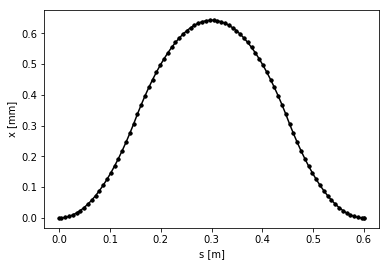

In [117]:
plt.plot(myTwiss.s,myTwiss.x*1000,'.-k')
plt.xlabel('s [m]')
plt.ylabel('x [mm]')

In [129]:
madx.elements.myk1_12.kick=0

In [130]:
madx.elements.myk1_12.kick

0.0

In [132]:
madx.twiss()7

<bound method Madx.twiss of <cpymad.madx.Madx object at 0x7ffa6deaa208>>

In [143]:
madx.elements.myk2_34.kick=0

In [144]:
madx.elements.myk2_34.kick

0.0